# VTA Mini Challenge 2

### Imports:

In [1]:
%pip install librosa soundfile

Note: you may need to restart the kernel to use updated packages.


'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\rami0\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import soundfile as sf
from scipy.fft import fft, fft2, fftfreq, fftshift, ifftshift, ifft2

## Aufgabe 1: Fouriertransformation

#### Die Fouriertransformation:

In [3]:
def f1(x):
    return 1/(np.exp(x)+np.exp(-x))

In [4]:
## (a)
def calc_kth_fourier_component(function, time_start = 0, time_end = 1, k = 1, n_samples = 1000):
    '''
    Calculates the Kth fourier component
    -----
    Inputs:
    function: function
        The function to calculate the fourier component of
    time_start: int
        The start peroid of the function (default 0)
    time_end: int
        The end peroid of the function (default 1)
    k: int
        The kth fourier component to calculate (default 1)
    n_samples: int
        The number of samples to use in the calculation (default 1000)
    -----
    Returns:
    kth_fourier_component: np.array
        The kth fourier component
    '''
    period = time_end - time_start
    t = np.linspace(time_start, time_end, n_samples)
    omega = 2 * np.pi / period

    A_k = 2 / period * np.trapz(function(t) * np.cos(k * omega * t), t)
    B_k = 2 / period * np.trapz(function(t) * np.sin(k * omega * t), t)

    kth_fourier_component = A_k * np.cos(k * omega * t) + B_k * np.sin(k * omega * t)

    return kth_fourier_component

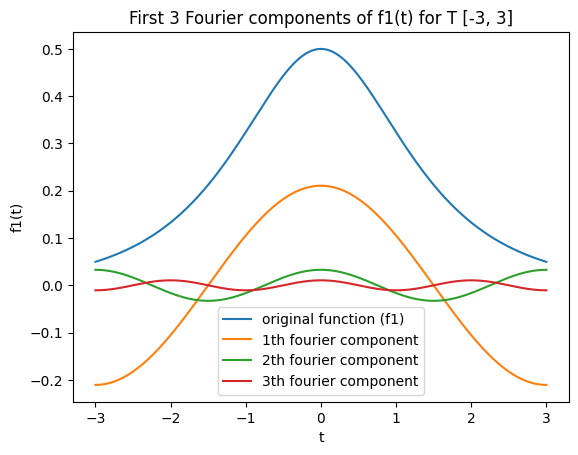

In [5]:
samples = 600
T = [-3, 3]
ks = [1, 2, 3]
t = np.linspace(T[0], T[1], samples)
kth_fourier_components = [calc_kth_fourier_component(f1, time_start=T[0], time_end=T[1], k=k, n_samples=samples) for k in ks]

plt.plot(t, f1(t), label = 'original function (f1)')
for k, fourier_component in zip(ks, kth_fourier_components):
    plt.plot(t, fourier_component, label = f'{k}th fourier component')
plt.title('First ' + str(len(ks)) + ' Fourier components of f1(t) for T [-3, 3]')
plt.xlabel('t')
plt.ylabel('f1(t)')
plt.legend()
plt.show()

In [6]:
## (b)
def calc_fourier_approx(function, time_start = 0, time_end = 1, n_components = 1, n_samples = 1000):
    '''
    Calculates the fourier approximation of a function
    -----
    Inputs:
    function: function
        The function to calculate the fourier approximation of
    time_start: int
        The start peroid of the function (default 0)
    time_end: int
        The end peroid of the function (default 1)
    n_components: int
        The number of fourier components to use in the approximation (default 1)
    n_samples: int
        The number of samples to use in the calculation (default 1000)
    -----
    Returns:
    fourier_approximation: np.array
        The fourier approximation of the function
    '''
    t = np.linspace(time_start, time_end, n_samples)

    average_value = (1 / (time_end - time_start)) * np.trapz(function(t), t)

    fourier_approximation = average_value + np.zeros(n_samples)
    for k in range(1, (2*n_components + 1)):
        fourier_approximation += calc_kth_fourier_component(function, time_start=time_start, time_end=time_end, k=k, n_samples=n_samples)

    return fourier_approximation

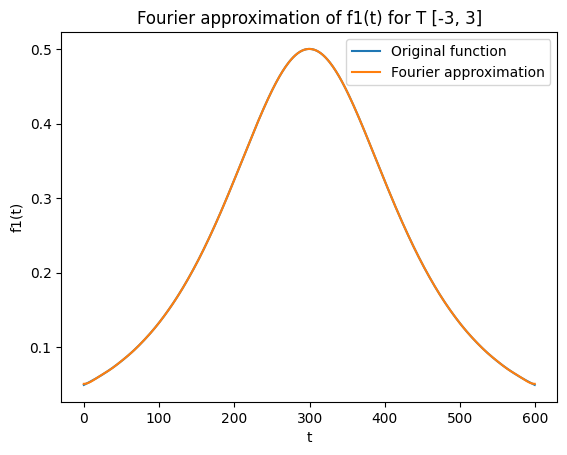

In [7]:
samples = 600
T = [-3, 3]

approx = calc_fourier_approx(f1, time_start=-3, time_end=3, n_components=10, n_samples=samples)

plt.plot(f1(t), label = 'Original function')
plt.plot(approx, label = 'Fourier approximation')
plt.title('Fourier approximation of f1(t) for T [-3, 3]')
plt.xlabel('t')
plt.ylabel('f1(t)')
plt.legend()
plt.show()

##### Average Error of the Fourier approximation:

In [8]:
def calc_percentage_error(function, time_start = 0, time_end = 1, n_components = 1, n_samples = 1000):
    '''
    Calculates the percentage error of the fourier approximation of a function
    -----
    Inputs:
    function: function
        The function to calculate the fourier approximation of
    time_start: int
        The start peroid of the function (default 0)
    time_end: int
        The end peroid of the function (default 1)
    n_components: int
        The number of fourier components to use in the approximation (default 1)
    n_samples: int
        The number of samples to use in the calculation (default 1000)
    -----
    Returns:
    percentage_error: float
        The percentage error of the fourier approximation of the function
    '''
    t = np.linspace(time_start, time_end, n_samples)

    fourier_approximation = calc_fourier_approx(function, time_start=time_start, time_end=time_end, n_components=n_components, n_samples=n_samples)
    percentage_error = np.abs(np.sum(function(t) - fourier_approximation)) / np.sum(function(t))

    return percentage_error

In [9]:
error_threshold = 0.001
samples = 600
error = calc_percentage_error(f1, time_start=-3, time_end=3, n_components=10, n_samples=samples)

print(f'Time Period: {-3, 3} with 600 samples and 10 components')
print(f'Error threshold: {error_threshold}')
print(f'Error: {error}')

assert error < error_threshold, f'Error {error} is greater than threshold {error_threshold}'

Time Period: (-3, 3) with 600 samples and 10 components
Error threshold: 0.001
Error: 9.926603060082621e-06


In [10]:
def f2(x):
    return np.exp(x)

def f3(x):
    return np.exp(np.abs(x))

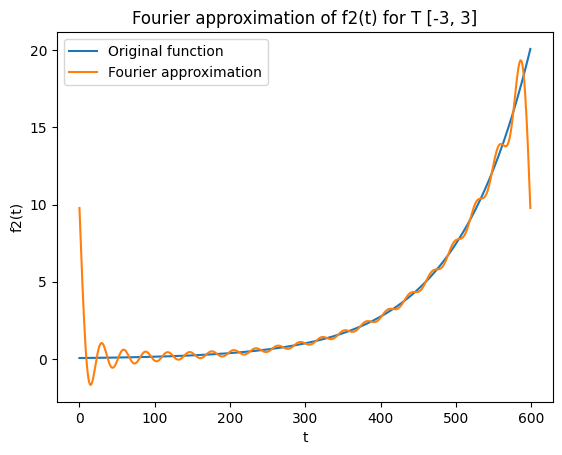

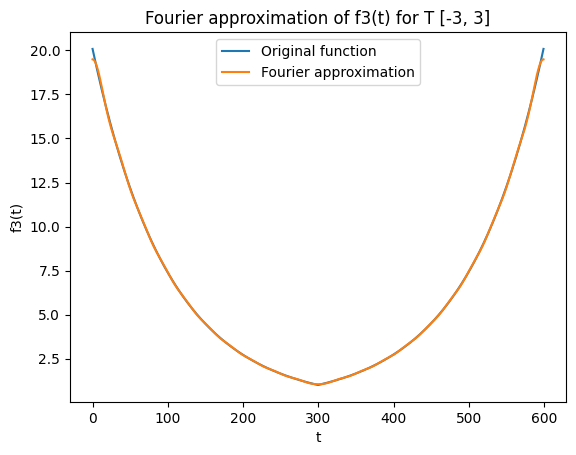

In [11]:
samples = 600
f2_approx = calc_fourier_approx(f2, time_start=-3, time_end=3, n_components=10, n_samples=samples)
f3_approx = calc_fourier_approx(f3, time_start=-3, time_end=3, n_components=10, n_samples=samples)

plt.plot(f2(t), label = 'Original function')
plt.plot(f2_approx, label = 'Fourier approximation')
plt.title('Fourier approximation of f2(t) for T [-3, 3]')
plt.xlabel('t')
plt.ylabel('f2(t)')
plt.legend()
plt.show()

plt.plot(f3(t), label = 'Original function')
plt.plot(f3_approx, label = 'Fourier approximation')
plt.title('Fourier approximation of f3(t) for T [-3, 3]')
plt.xlabel('t')
plt.ylabel('f3(t)')
plt.legend()
plt.show()

##### Error of the Fourier approximation for F2(x) and F3(x):

In [12]:
error_f2 = calc_percentage_error(f2, time_start=-3, time_end=3, n_components=10, n_samples=samples)
error_f3 = calc_percentage_error(f3, time_start=-3, time_end=3, n_components=10, n_samples=samples)

print(f'Time Period: {-3, 3} with 600 samples and 10 components')
print(f'Error threshold: {error_threshold}')
print(f'Error for e^x: {error_f2}')
print(f'Error for e^|x|: {error_f3}')

# assert error_f2 > error_threshold, f'Error {error_f2} is greater than threshold {error_threshold}'
# assert error_f3 > error_threshold, f'Error {error_f3} is greater than threshold {error_threshold}'

Time Period: (-3, 3) with 600 samples and 10 components
Error threshold: 0.001
Error for e^x: 0.00014707163750056292
Error for e^|x|: 0.00015492858625525954


Beide Funktionen überschreiten die Fehlerschwelle aufgrund ihrer exponentiellen Natur. Exponentielle Funktionen stellen eine Herausforderung dar, wenn sie mit einer begrenzten Anzahl von Kosinus- und Sinusfunktionen in einer Fourier-Approximation modelliert werden sollen. Die Natur exponentieller Funktionen ist durch schnelles Wachstum oder Abfallen gekennzeichnet, das nicht leicht von einer begrenzten Anzahl von Fourier-Komponenten erfasst werden kann. Während die Fourier-Reihe eine genaue Darstellung für Funktionen mit periodischem Verhalten oder endlicher Energie liefern kann, zeigen exponentielle Funktionen ein unbegrenztes Wachstum oder Abfallen, das von einer endlichen Anzahl sinusförmiger Komponenten nicht genau erfasst werden kann.

## Aufgabe 2:

(315,)


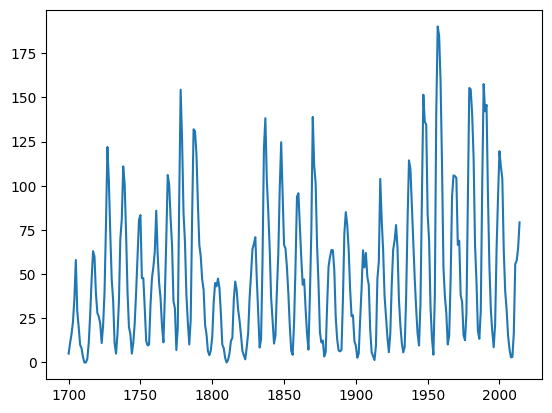

In [13]:
# Load Data
data = np.loadtxt("./data/sunspots.txt")

data = data.reshape(-1)
years = data[::2]
sunspots = data[1::2]
sunspotsWithoutMean = sunspots - np.mean(sunspots)

print(sunspotsWithoutMean.shape)

plt.plot(years, sunspots)

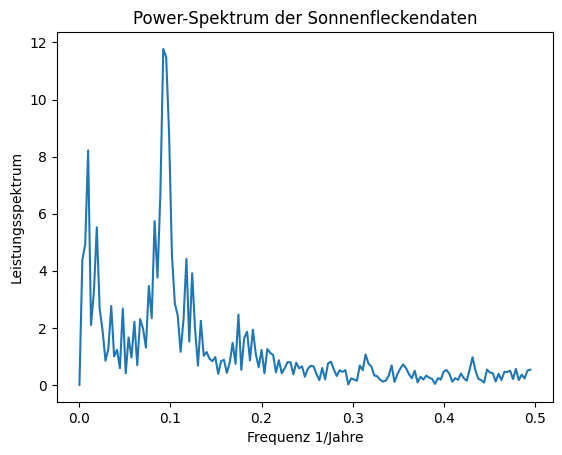

Dominante Periodizität: 10.86206896551724 Jahre
Dominante Perioden: [ 11.25       105.          10.16129032  10.5         10.86206897] Jahre


In [14]:
# Fourier-Transformation
fft_data = np.fft.fft(sunspotsWithoutMean)
fft_data_norm = 1 / len(sunspotsWithoutMean) * fft_data
power_spectrum = np.abs(fft_data_norm)

# Frequenzen berechnen
sampling_rate = 1  # Annahme: Eine Beobachtung pro Zeiteinheit
n = len(sunspotsWithoutMean)
frequencies = np.fft.fftfreq(n, d=1 / sampling_rate)
#frequencies = np.abs(frequencies)
# Dominante Periodizität finden
dominant_frequency = frequencies[np.argmax(power_spectrum)]
periodInYears = 1 / dominant_frequency



# Power-Spektrum plotten
plt.plot(frequencies[:n//2], power_spectrum[:n//2])
plt.xlabel('Frequenz 1/Jahre')
plt.ylabel('Leistungsspektrum')
plt.title('Power-Spektrum der Sonnenfleckendaten')
plt.show()

print(f'Dominante Periodizität: {periodInYears} Jahre')


# Die 5 dominantesten Perioden finden
dominant_periods = np.abs(1 / frequencies[np.argsort(power_spectrum)[-10::2]])
print(f'Dominante Perioden: {dominant_periods} Jahre')

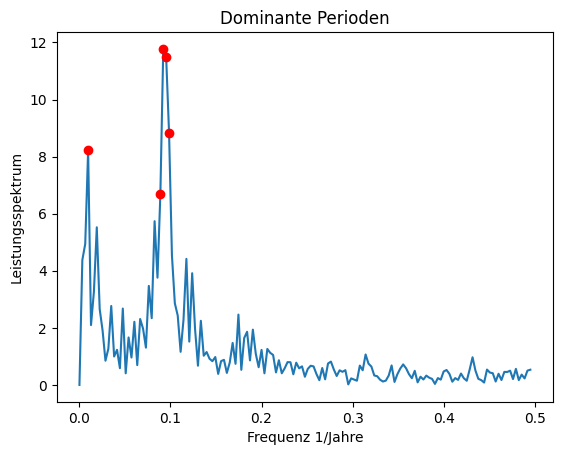

In [15]:
plt.plot(frequencies[:n//2], power_spectrum[:n//2])
sortedPowerSpectrumIndex = np.argsort(power_spectrum)
xRichtung = np.abs(frequencies[sortedPowerSpectrumIndex[-10::2]])
yRichtung = power_spectrum[sortedPowerSpectrumIndex[-10::2]]

plt.title('Dominante Perioden')
plt.xlabel('Frequenz 1/Jahre')
plt.ylabel('Leistungsspektrum')

plt.plot(xRichtung, yRichtung, 'ro')

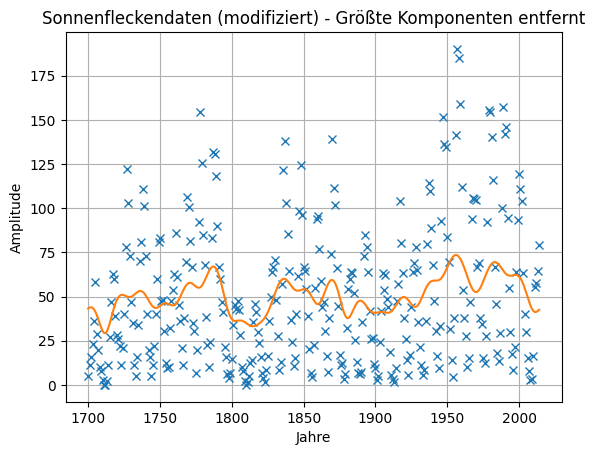

In [16]:
fft_data = np.fft.fft(sunspots)
fft_data_modified = 1 / len(sunspotsWithoutMean) * fft_data
fft_data_modified[20:] = 0

# Rücktransformation
data_modified = np.fft.ifft(fft_data_modified)
data_modified = np.abs(data_modified) * len(fft_data_modified)

# Plotten der modifizierten Daten
plt.plot(years, sunspots, 'x')
plt.plot(years, data_modified.real)
plt.xlabel('Jahre')
plt.ylabel('Amplitude')
plt.title('Sonnenfleckendaten (modifiziert) - Größte Komponenten entfernt')
plt.grid(True)
plt.show()

Durch das Entfernen der grössten 20 Komponenten wird die Varianz runtergestaucht. Es gibt keine regelmässigen Ausreisser mehr. Bei diesem Beispiel gehen wichtige Frequenzen verloren, wourch die Periodizität nicht mehr erkennbar ist.

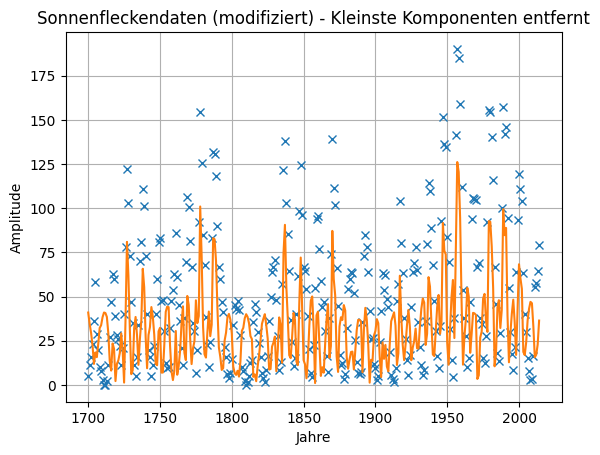

In [17]:
fft_data = np.fft.fft(sunspots)
fft_data_modified = 1 / len(sunspots) * fft_data
# Kleinsten Komponenten entfernen (k < 5)
fft_data_modified[:5] = 0

# Rücktransformation
data_modified = np.fft.ifft(fft_data_modified)
data_modified = np.abs(data_modified) * len(fft_data_modified)

# Plotten der modifizierten Daten
plt.plot(years, sunspots, 'x')
plt.plot(years, data_modified.real)
plt.xlabel('Jahre')
plt.ylabel('Amplitude')
plt.title('Sonnenfleckendaten (modifiziert) - Kleinste Komponenten entfernt')
plt.grid(True)
plt.show()

Durch das Entfernen der kleinsten 5 Komponenten werden alle Ausreisser verstärkt dargestellt. Die Periodizität ist immer noch erkennbar, jedoch sind die Ausreisser viel stärker ausgeprägt. Die Varianz ist höher als bei den originalen Daten.

## Aufgabe 2 d):
Der grösste Unterschied ist, dass die Daten von Aufgabe 2 nicht exakt periodisch sind. Dadurch ist es für die Fourier-Reihe nicht möglich, die Daten exakt zu approximieren. Die Fourier-Reihe ist nur für periodische Daten geeignet. Dadurch muss zuerst die Periode herausgelesen werden. Ein Unterschied ist ebenfalls dass die Auflösung, also die Anzahl Schritte pro Periode, bei Aufgabe 2 bereits vorgegeben ist.

## Aufgabe 3:

In [18]:
audio_data, sampling_rate = librosa.load('./data/music.wav')

Duration of audio: 3.564036 seconds


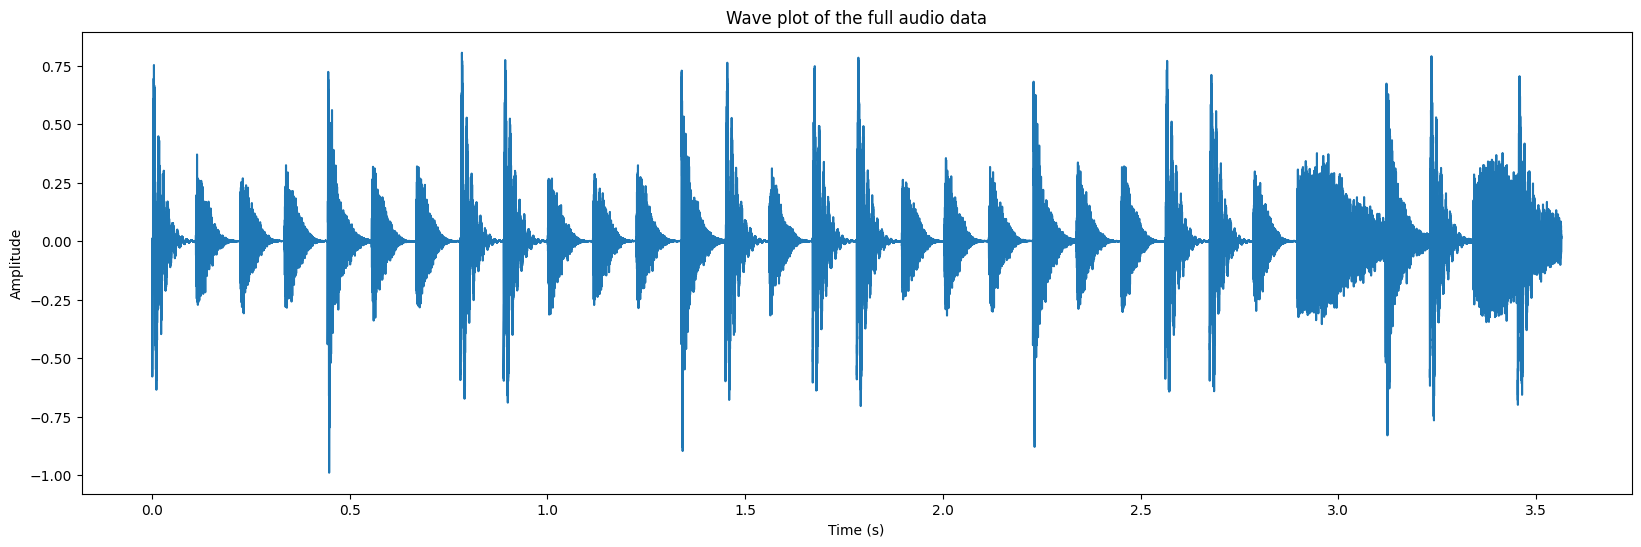

In [19]:
duration = len(audio_data) / sampling_rate
time = np.linspace(0, duration, len(audio_data))
print(f'Duration of audio: {duration:2f} seconds')

plt.figure(figsize=(20, 6))
plt.plot(time, audio_data)
plt.title('Wave plot of the full audio data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

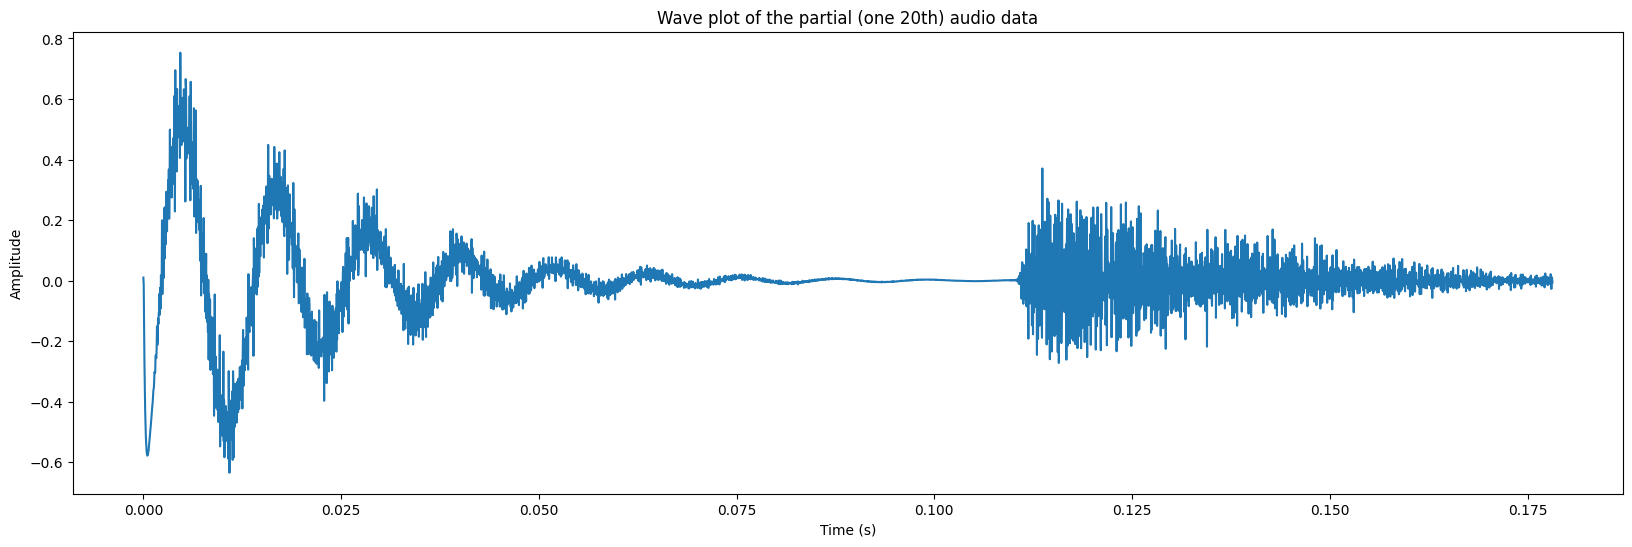

In [20]:
partial_audio_data = audio_data[:int(len(audio_data) / 20)]
partial_time = time[:int(len(audio_data) / 20)]

plt.figure(figsize=(20, 6))
plt.plot(partial_time, partial_audio_data)
plt.title('Wave plot of the partial (one 20th) audio data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

##### Symmetrie des amplitudenspektrums:
Die Symmetrie zwischen positivem und negativem Raum entsteht durch die Natur reellwertiger Signale und deren Darstellung im Zeitbereich. Da Schallwellen physikalische Vibrationen sind, die sich durch ein Medium wie Luft ausbreiten, entsprechen positive und negative Amplituden in einer reellwertigen Wellenform den Kompressionen und Rarefaktionen des Mediums während der Schallwellenausbreitung.

####  FFT des Signals:
##### 3b.1) Trennen von frequenzen under und ober 2000Hz:

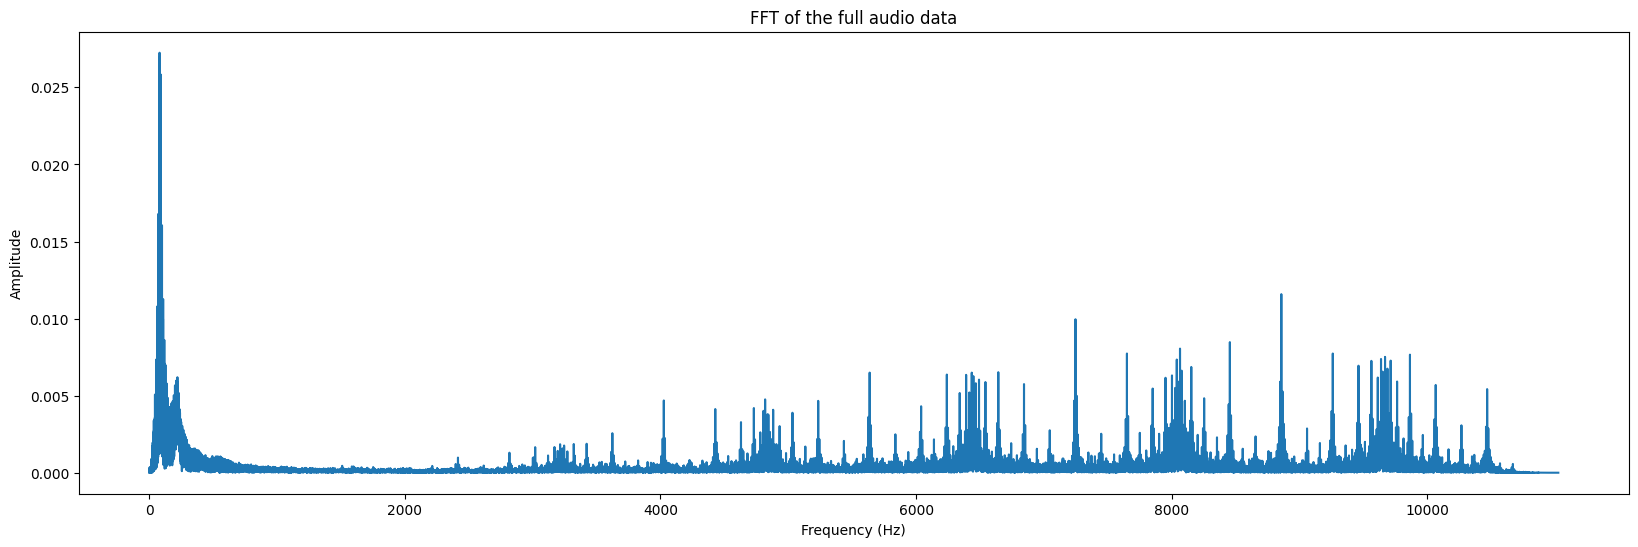

In [21]:
yf = fft(audio_data)
xf = fftfreq(len(audio_data), 1 / sampling_rate)

positive_freq_axis = xf[:int(len(xf) // 2)]
positive_fft_data = 2 / len(audio_data) * np.abs(yf[:int(len(yf) // 2)])

plt.figure(figsize=(20, 6))
plt.plot(positive_freq_axis, positive_fft_data)
plt.title('FFT of the full audio data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

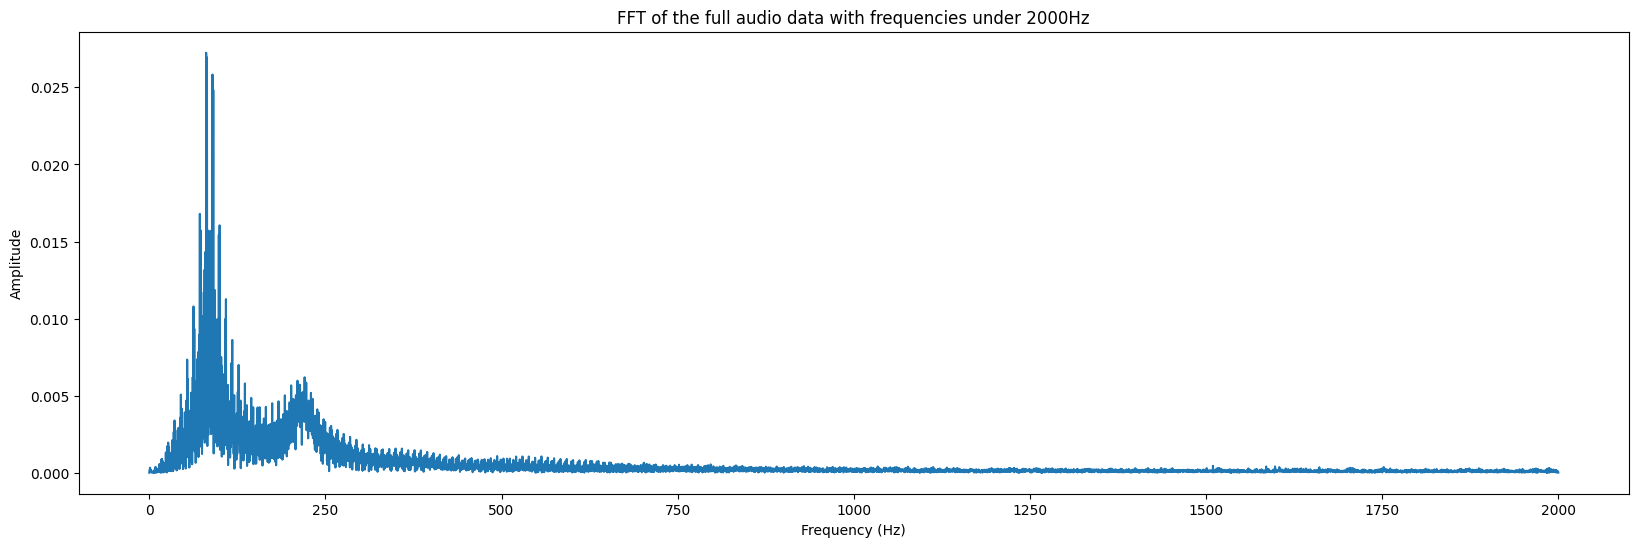

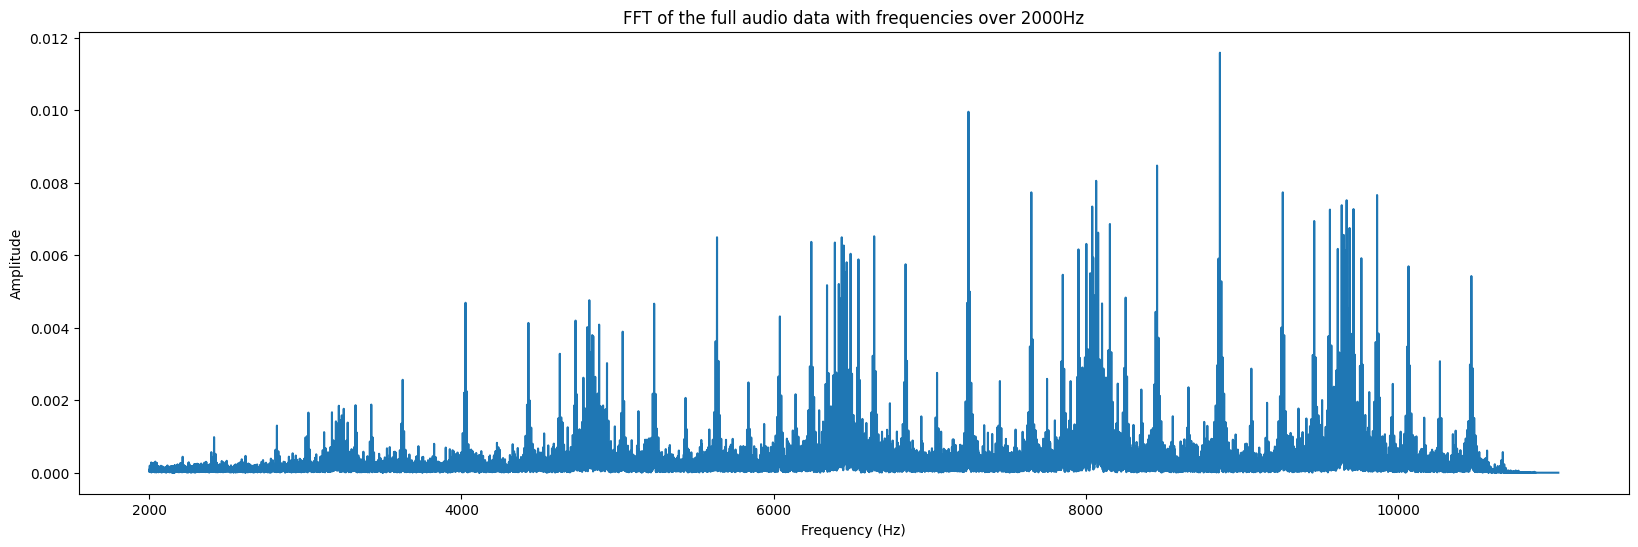

In [22]:
freq_threshold = 2000

fft_data_u2000 = positive_fft_data[positive_freq_axis < freq_threshold]
freq_axis_u2000 = positive_freq_axis[positive_freq_axis < freq_threshold]

fft_data_o2000 = positive_fft_data[positive_freq_axis >= freq_threshold]
freq_axis_o2000 = positive_freq_axis[positive_freq_axis >= freq_threshold]

plt.figure(figsize=(20, 6))
plt.plot(freq_axis_u2000, fft_data_u2000)
plt.title('FFT of the full audio data with frequencies under 2000Hz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(20, 6))
plt.plot(freq_axis_o2000, fft_data_o2000)
plt.title('FFT of the full audio data with frequencies over 2000Hz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

##### 3b.2) Die 5 top frequenzen:

Top 5 frequencies under 2000Hz: [71.82867395 90.90816547 89.78584244 81.92958123 80.8072582 ]
Top 5 frequencies over 2000Hz: [9260.00674412 8064.73271661 8454.73996972 7246.83980811 8857.37335692]


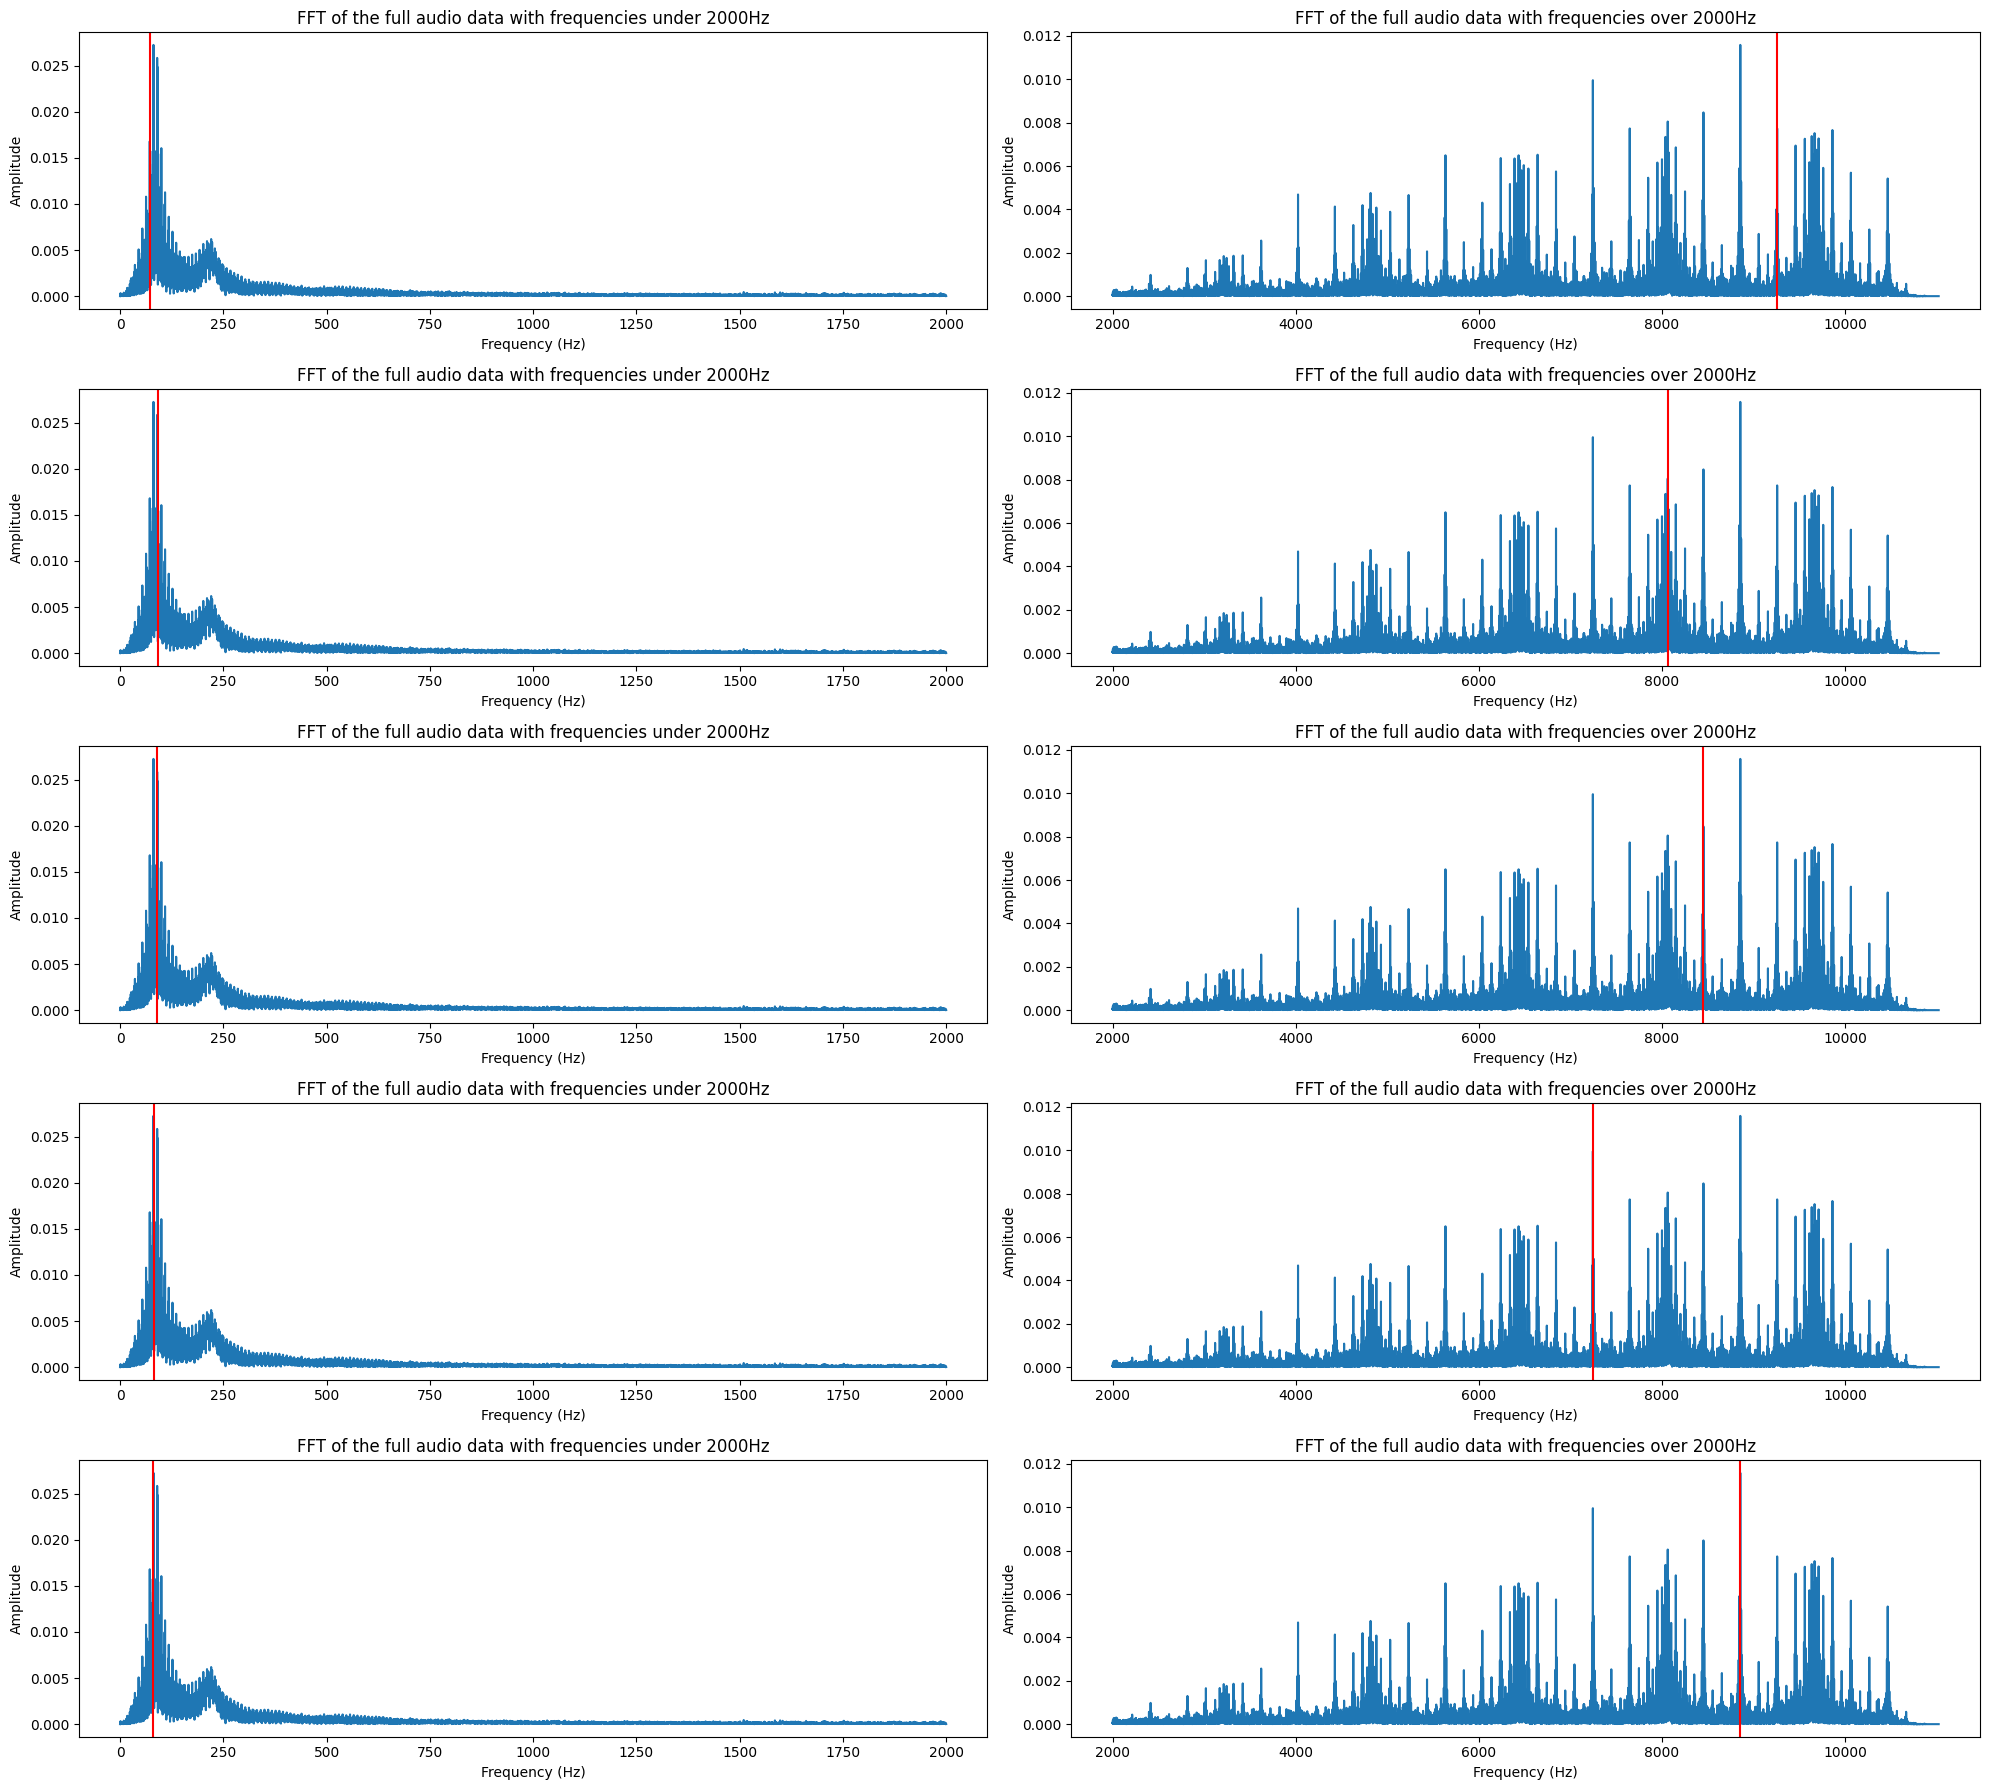

In [23]:
top5u2000 = np.argsort(fft_data_u2000)[-5:]
top5o2000 = np.argsort(fft_data_o2000)[-5:]

print(f'Top 5 frequencies under 2000Hz: {freq_axis_u2000[top5u2000]}')
print(f'Top 5 frequencies over 2000Hz: {freq_axis_o2000[top5o2000]}')

fig, axs = plt.subplots(5, 2, figsize=(20, 18))
for i in range(5):
    axs[i, 0].plot(freq_axis_u2000, fft_data_u2000)
    axs[i, 0].set_title(f'FFT of the full audio data with frequencies under 2000Hz')
    axs[i, 0].set_xlabel('Frequency (Hz)')
    axs[i, 0].set_ylabel('Amplitude')
    axs[i, 0].axvline(freq_axis_u2000[top5u2000[i]], color='red')
    axs[i, 1].plot(freq_axis_o2000, fft_data_o2000)
    axs[i, 1].set_title(f'FFT of the full audio data with frequencies over 2000Hz')
    axs[i, 1].set_xlabel('Frequency (Hz)')
    axs[i, 1].set_ylabel('Amplitude')
    axs[i, 1].axvline(freq_axis_o2000[top5o2000[i]], color='red')

fig.tight_layout()
plt.show()

#### 3c) Rekonstruktion des Signals:

Error of the reconstructed signal: 82.81031036376953%


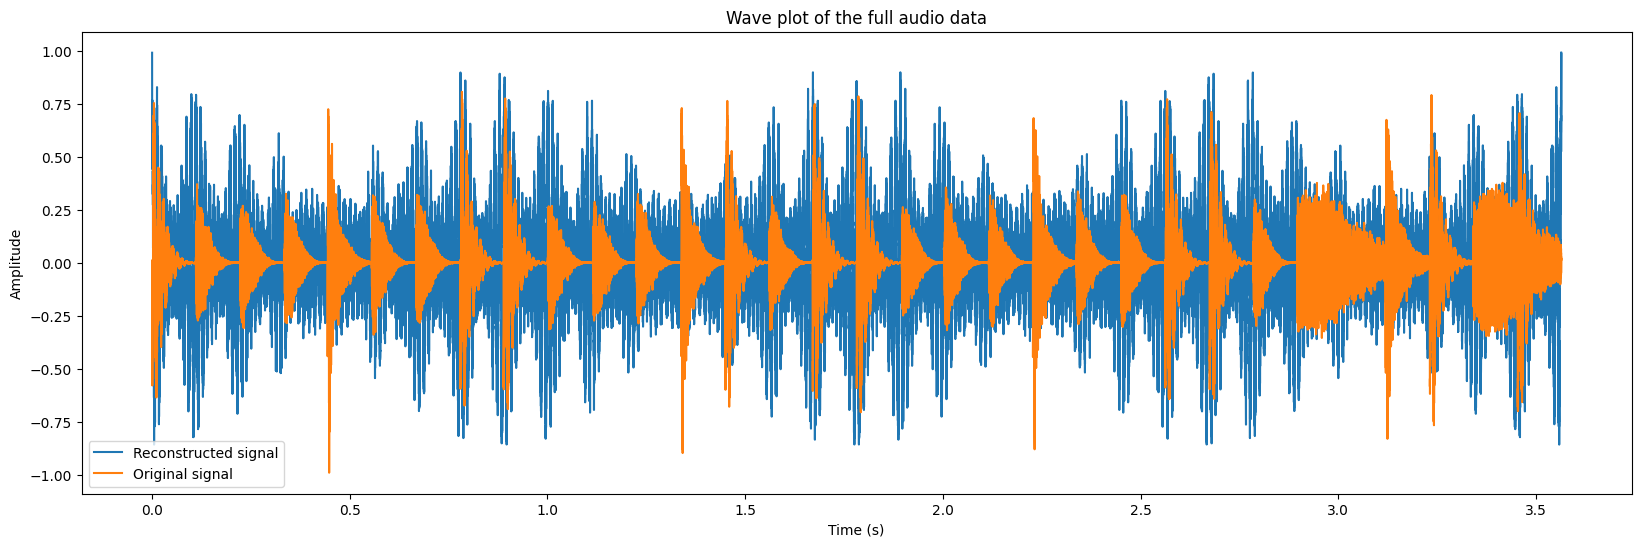

In [24]:
reconstructed_signal = np.zeros_like(audio_data)

for i in top5u2000:
    frequency = freq_axis_u2000[i]
    amplitude = fft_data_u2000[i]
    reconstructed_signal += amplitude * np.cos(2 * np.pi * frequency * time)

for i in top5o2000:
    frequency = freq_axis_o2000[i]
    amplitude = fft_data_o2000[i]
    reconstructed_signal += amplitude * np.cos(2 * np.pi * frequency * time)

# Normalize the reconstructed signal to the same amplitude as the original signal
reconstructed_signal *= np.max(np.abs(audio_data)) / np.max(np.abs(reconstructed_signal))

residuals_recon = audio_data - reconstructed_signal
sum_residuals_recon = np.sum(residuals_recon)
sum_original_signal = np.sum(audio_data)
error = np.abs(sum_residuals_recon / sum_original_signal)

print(f'Error of the reconstructed signal: {error}%')

plt.figure(figsize=(20, 6))
plt.plot(time, reconstructed_signal, label='Reconstructed signal')
plt.plot(time, audio_data, label='Original signal')
plt.title('Wave plot of the full audio data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [25]:
sf.write('./data/reconstructed_music.wav', reconstructed_signal, sampling_rate)

Wie erwartet klingt das rekonstruierte Signal bei Beschränkung auf nur seine zehn Spitzenfrequenzen weit entfernt vom Original. Wenn man sich das Wellenform-Diagramm der rekonstruierten Daten ansieht, gibt es eine gewisse Ähnlichkeit zu den Mustern der Originalwelle. Jedoch klingt es in der tatsächlichen Wiedergabe vollkommen fremd im Vergleich und ähnelt eher einem einzigen, sehr hohen Frequenzreinen Ton. Wenn man darüber nachdenkt, ist das auch genau das, was das rekonstruierte Signal ist – eine Summe von reinen Tönen, bei der die fünf höchsten Frequenzen das Signal dominieren.

## Aufgabe 4:

In dieser Aufgabe analysieren und bearbeiten Sie eine Bilddatei (img.jpg). Sie dürfen dafür die fft routine von numpy oder scipy verwenden.

(a) Plotten Sie die 2D-Verteilung der absoluten Werte der Fourier-Komponenten, sodass die kleinsten k-Werte in der Mitte liegen. Erklären Sie die Natur der Verteilung.

(b) Entfernen Sie je die Fourier-Komponenten mit absoluter Amplitude unter dem Schwellenwert 0.001%, 0.01%, 0.1%, 1% und 10% der maximalen Amplitude. Führen Sie eine inverse Fourier-Transformation durch und stellen Sie die gefilterten Fourierkomponenten sowie die resultierenden Bilder dar. Beschreiben und erklären Sie die Unterschiede.

(c) Berechnen Sie den Fehler (Aufgabe 1) zwischen rekonstruiertem und Originalbild. Wie weit können die Daten kompressiert werden, ohne einen Fehler von höchstens 1% zu überschreiten?

(2304, 3456, 3)


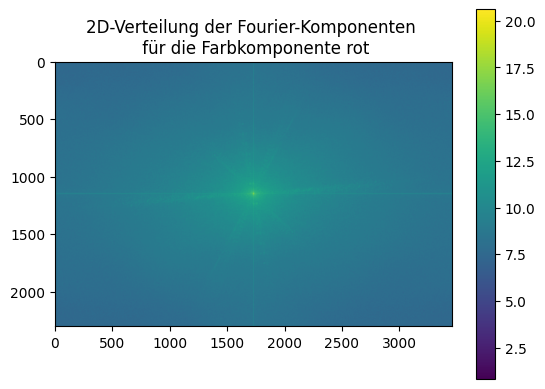

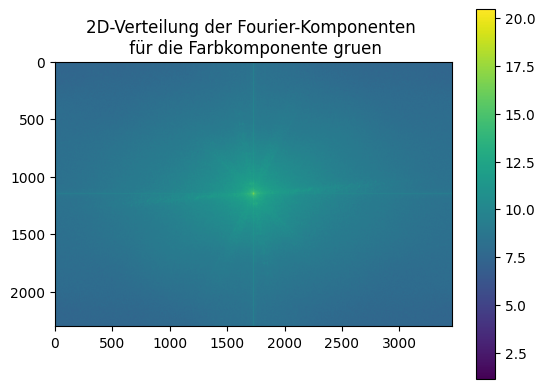

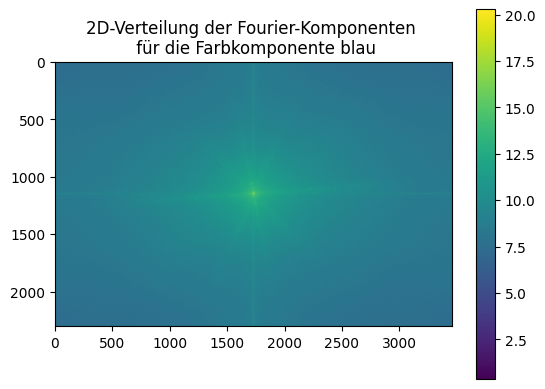

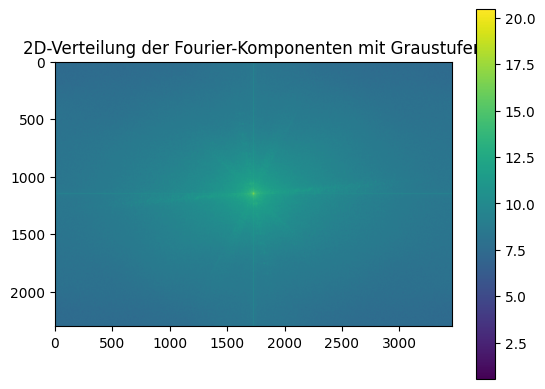

In [26]:
# (a) Plotte die 2D-Verteilung der Fourier-Komponenten

# Lade das Bild
image = plt.imread('./data/img.jpg')
image_gray = np.mean(image, axis=2)  # Konvertiere in Graustufen

print(image.shape)
image_red = image[:,:,0]
image_green = image[:,:,1]
image_blue = image[:,:,2]

#Wir teilen das Bild in die drei rgb-Farbkomponenten auf und einmal gesamthaft in Graustugen um genauer zu sehen, wie sich die Transformation verhält
channels = [image_red, image_green, image_blue, image_gray]
fft_channels = []

# Berechne die 2D-FFT
for channel in channels:
    fft_image = np.fft.fft2(channel)
    fft_image = np.fft.fftshift(fft_image)
    fft_channels.append(fft_image)

colors = ["rot", "gruen", "blau"]
# Plotte die Verteilung der absoluten Werte der Fourier-Komponenten für jede Farbkomponente
for fft_image, color in zip(fft_channels, colors):
    plt.imshow(np.log(np.abs(fft_image)), cmap='viridis')
    plt.colorbar()
    plt.title(f'2D-Verteilung der Fourier-Komponenten \n für die Farbkomponente {color}')
    plt.show()
    
plt.imshow(np.log(np.abs(fft_channels[3])), cmap='viridis')
plt.colorbar()
plt.title(f'2D-Verteilung der Fourier-Komponenten mit Graustufen')
plt.show()

Im Allgemeinen haben natürliche Bilder eine Potenzgesetz-Beziehung in ihren Spektren der Magnitude, die als "1/f" oder "pinkes" Rauschen bekannt ist. Das bedeutet, dass die Magnituden abnehmen, wenn die Frequenz ansteigt und sich ungefähr umgekehrt proportional verhalten. Folglich konzentriert sich die Mehrheit der Energie in den niedrigeren Frequenzkomponenten, die die Gesamtstruktur und globalen Merkmale des Bildes repräsentieren.

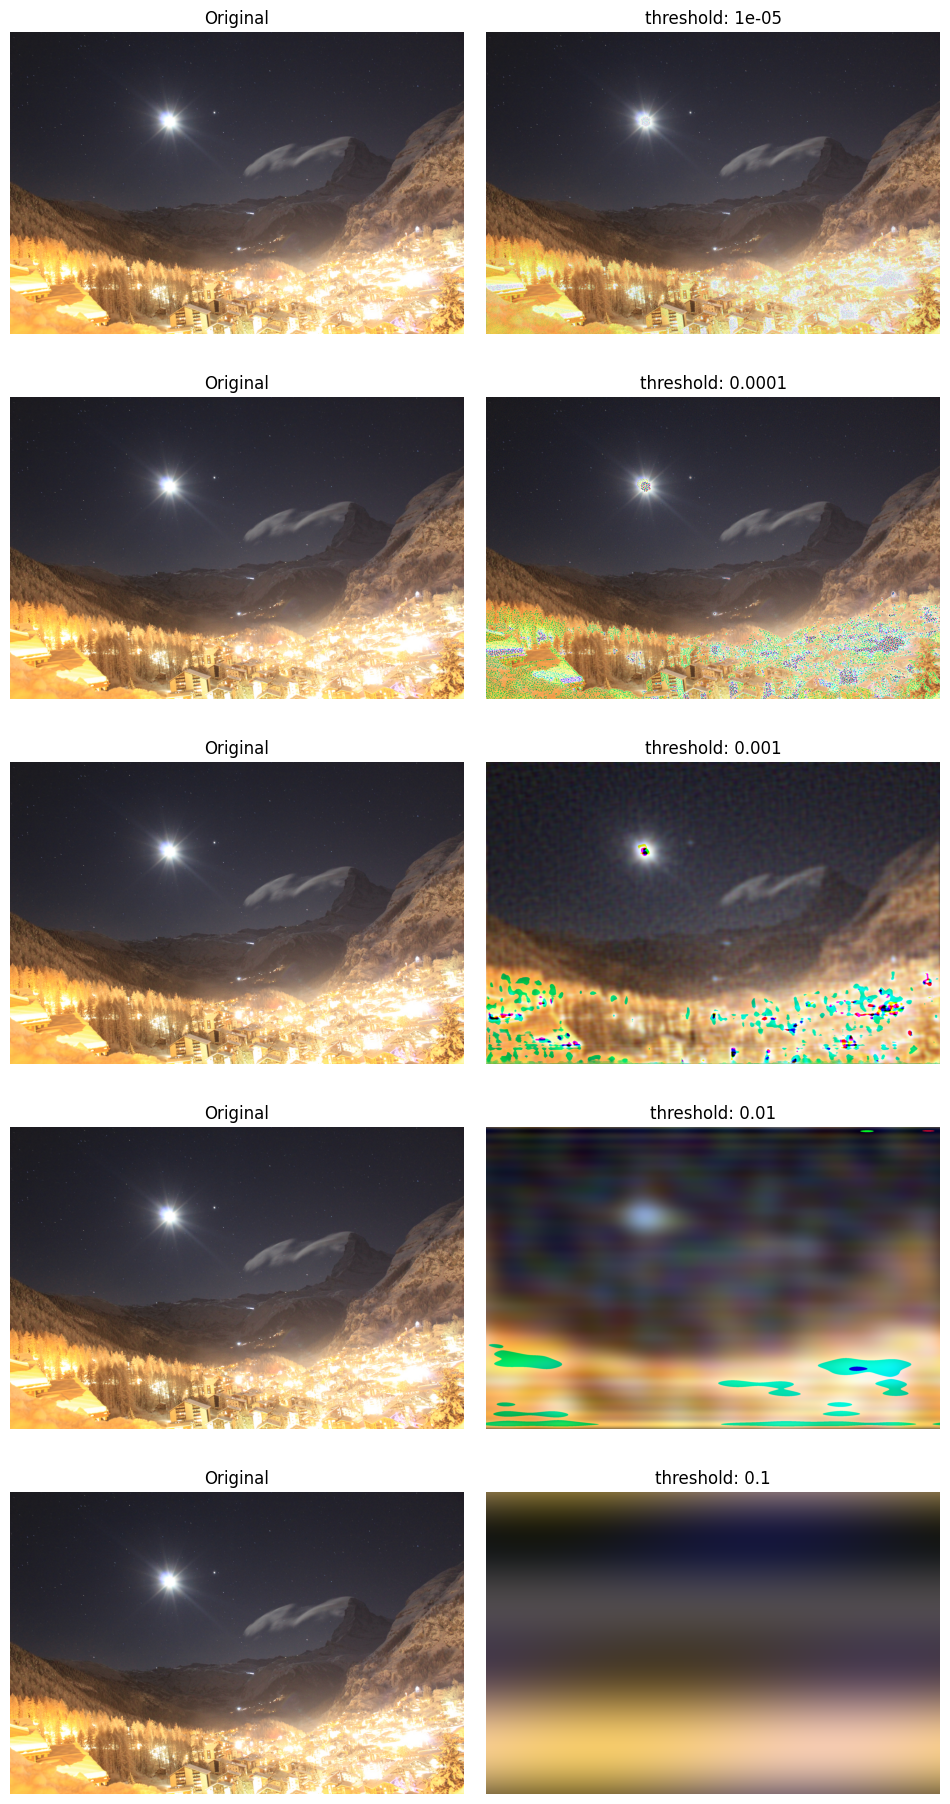

In [35]:
# (b) Entferne Fourier-Komponenten unter verschiedenen Schwellenwerten

# Funktion zum Entfernen von Fourier-Komponenten unter einem Schwellenwert
def remove_components(fft_image, threshold):
    filtered_fft = np.copy(fft_image)
    amplitude = np.abs(filtered_fft)
    max_amplitude = np.max(amplitude)
    filtered_fft[amplitude < threshold * max_amplitude] = 0
    return filtered_fft

def filter_image(threshold):
    filtered_image = np.empty_like(image)
    for i in range(3):
        filtered_fft = remove_components(fft_channels[i], threshold)
        filtered_image[:,:,i] = np.real(ifft2(np.fft.ifftshift(filtered_fft)))
    return filtered_image

# Liste der Schwellenwerte
thresholds = [0.00001, 0.0001, 0.001, 0.01, 0.1]

# Filtern der Fourier-Komponenten und inverse Fourier-Transformation
filtered_images = []
for threshold in thresholds:
    filtered_images.append(filter_image(threshold))


# Plotte die gefilterten Fourier-Komponenten und die resultierenden Bilder
fig, axes = plt.subplots(len(thresholds), 2, figsize=(12, 36))
titles = ['Original'] + [f'{threshold}' for threshold in thresholds]

plt.subplots_adjust(wspace=0.05, top = 0.6) 

col = [1]

for i in range(len(thresholds)):
    axes[i, 0].imshow(image)
    axes[i, 0].set_title(titles[0])
    axes[i, 0].axis('off')
    for y in range(len(col)):
        axes[i, y + 1].imshow(filtered_images[i])
        axes[i, y + 1].set_title('threshold: ' + titles[i+1])
        axes[i, y + 1].axis('off')

plt.show()

Mit zunehmendem Schwellenwert zeigen die gefilterten Bilder deutliche Unterschiede in der Qualität. Zunächst, bis zu einem Schwellenwert von 0,1%, sind die Unterschiede für das menschliche Auge kaum wahrnehmbar. Allerdings werden bei diesem Schwellenwert einige feinere Details wie Sterne am Nachthimmel entfernt, was zu einem leichten Verlust der Bildtreue führt. Sobald der Schwellenwert 1% und mehr erreicht, werden die gefilterten Bilder extrem verschwommen und verzerrt. Dieser Unschärfe- und Verzerrungseffekt entsteht durch das Entfernen von Fourier-Komponenten mit höheren Amplituden, die wichtige hochfrequente Informationen beinhalten, welche für die Erfassung feiner Details und Kanten im Bild verantwortlich sind. Daher ist es wichtig, eine ausgewogene Balance zwischen Rauschreduzierung und dem Erhalt wesentlicher Bildmerkmale zu finden, wenn man einen geeigneten Schwellenwert für die Filterung auswählt.

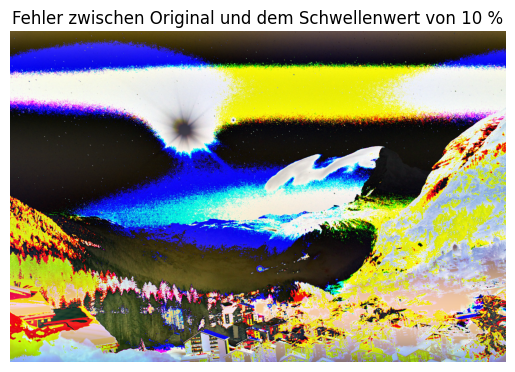

In [28]:
# Visualisierung des Fehlers zwischen Original und dem Schwellenwert von 10 %
plt.imshow(filtered_images[4] - image)
plt.title('Fehler zwischen Original und dem Schwellenwert von 10 %')
plt.axis('off')
plt.show()

3.5762786865234375e-06


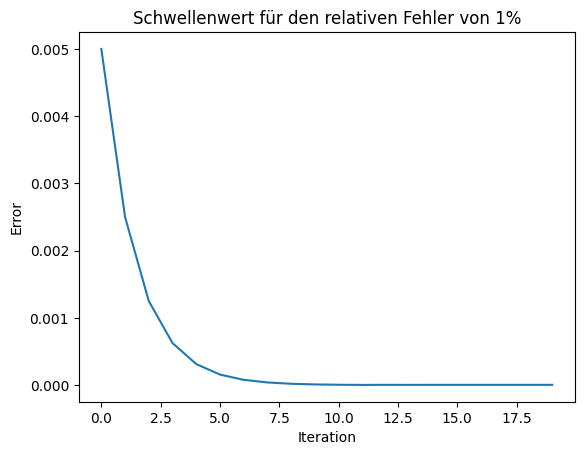

In [29]:
# leicht angepasste Version der relativen Fehlerberechnung um eine Teilung durch 0 zu verhindern
def calculate_relative_mean_error(original, approximation):
    return np.mean(np.abs(original - approximation)) / np.mean(np.abs(original))

max_relative_error = 0.01  # 1% relativer Fehler
error = 1
    
max_t = 0.01
min_t = 0

threshold = 0.005
thresholds = []

while not np.isclose(error, max_relative_error, atol=1e-5):
    thresholds.append(threshold)
    filtered = filter_image(threshold)
    error = calculate_relative_mean_error(image, filtered)
    if error > max_relative_error:
        max_t = threshold
        threshold = 0.5 * (min_t + threshold)
    else:
        min_t = threshold
        threshold = 0.5 * (max_t + threshold)
        
print(thresholds[-1])

plt.plot(thresholds)
plt.title('Schwellenwert für den relativen Fehler von 1%')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

# Lerntagebuch:

### 25/05/2023:
* Rami:
  * Aufgabe 1 Fourier transformation:
    * Mit hilfe von chatGPT die mathe von der Fourier approximation und komponente zu python gebracht.
    * Hatte probleme am amfang mit den komponenten weil ich nur die end zeit genommen anstatt die ganze zeit periode.
    * Hatte ein problem bei der approximation, das die approximation bei 0 an der y achse war. Musste noch den average von der original funktion addieren.
    * Habe meine kleinen Erklärungen/infos auf English geschrieben und danach mit chatGPT und deepl überzetzt (Für alle fragen).
* Denis
    * Aufgabe 1 Fourier transformation:
        * Zuerst habe ich einige der Videos von Daniel Jung zu diesem Thema geschaut.
        * Danach habe ich ChatGPT gefragt ob er dies Programmieren könne. Jedoch konnte ich nicht korrigieren, ob er alles richtig gemacht hat, da ich das Thema noch nicht verstanden habe.
        * Daraufhin habe ich normal gegoogelt und bin auf eine interessante Seite zweier amerikanischen Professoren gestossen ("https://databookuw.com/page-2/page-21/", 25.05.2023). Ich habe die Videos geschaut und versucht den Code zu verstehen.
        * Ich habe mit dem Code und den Variablen und Inputs rumgespielt.
* Flurina:
    * Aufgabe 1:
        * Die Aufgabe habe ich chatGPT gefüttert. Das meiste der Berechnungen konnte ich so übernehmen, ausser dass bei Aufgabe 1b bei der Addition der Fourrierkomponente ein /2 eingetragen war. Das gehört dort nicht hin und nach löschen der Division hat dann auch das Resultat richtig ausgesehen
        * Für 1e musste ich mir selber noch überlegen, wie ich den Code so anpassen kann, dass das Programm nicht ewig läuft und habe eine Exit-Möglichkeite eingebaut falls der Threshold nie erreicht werden kann.


### 29/05/2023:
* Rami:
  * Aufgabe 3 Audio Signale:
    * Mit hilfe von chatGPT librose und fft von scipy implementiert und die frequenzen geplottet.
    * Das trennen und plotten von den frequenzen habe ich selbst gemacht.
    * Mit hilfe von chatGPT die rekunstruktion von den signalen implementiert.


### 30/05/2023:
* Denis:
    * Aufgabe 2 Sonnenflecken:
        * Ich habe mir zuerst den Aufbau der Daten angeschaut und mich damit beschäftigt, wie dich diese richtig importieren können.
        * Zuerst habe ich die ganze Aufgabe in ChatGTP hineingeschmissen, jedoch kam da keine brauchbare Lösung heraus. Ich konnte jedoch einige Teile des Codes übernehmen.
        * Jedoch habe ich lange nicht gemerkt dass ich nach der Fast Fourier Transformation nicht normiert und deshalb falsche Ergebnisse bekommen habe.
* Flurina:
    * Aufgabe 4
        * Für die grundsätzliche Code-Struktur habe ich chatGPT verwendet, im Endeffekt habe ich dann aber vieles selber noch angepasst:
            * Die Darstellung der 2D-Verteilung der Fourrierkomponenten mit allen Farben auf einmal (analog zu den Graustufen) ist leider nicht sehr aussagekräftig. Man sieht zwar ein Muster aber nur sehr schwach. Daher habe ich das Bild zuerst in seine rgb-Werte aufgeteilt und diese einzeln noch ausgegeben. So sind die Muster leichter erkennbar.


### 01/06/2023:
* Denis:
    * Aufgabe 2 Sonnenflecken:
        * Nun habe ich mich mit der Aufgabe c beschäftigt. Hier konnte ich viel von ChatGTP übernehmen. Jedoch musste ich auch hier die Normierung nach der Rücktransformation selbst einfügen.
        * Ich hatte jedoch ein wenig Probleme die Ergebnisse aus Aufgabe c) zu interpretieren.